In [5]:
pip install "numpy<2.0" 

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 162.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 3.3 MB/s eta 0:00:05
    --------------------------------------- 0.3/15.5 MB 3.8 MB/s eta 0:00:04
   - -------------------------------------- 0.5/15.5 MB 3.9 MB/s eta 0:00:04
   - -------------------------------------- 0.7/15.5 MB 4.1 MB/s eta 0:00:

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygam 0.9.1 requires scipy<1.12,>=1.11.1; python_version >= "3.9" and python_version < "3.13", but you have scipy 1.14.1 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

In [2]:
ptb_data = pd.read_csv(r'C:\Users\jeffr\Downloads\ptb_data.csv')

In [171]:
# df_encoded = ptb_data.drop(columns = ['PTB Defence','Anonymize 1PlayerId', 'EventName', 'Club Id', 'Opposition Id', 'PTB Contest', 
#                                         'PTB Ultimate Outcome', 'WeatherConditionName'])


df_encoded = ptb_data.drop(columns = ['PTB Defence', 'Anonymize 1PlayerId', 'Player Id', 'ZonePhysical', 'MatchId', 'Tackle', 'OppScore', 'Home Score', 'Away Score', 'PTB Tackle Result', 'EventName', 'TotalPossessionSecs', 'PositionId', 'ElapsedTime',
                                     'Half', 'OppPossessionSecs'])

df_encoded = pd.get_dummies(df_encoded, columns=['WeatherConditionName', 'Club Id', 'Opposition Id', 'PTB Contest', 'PTB Ultimate Outcome', 'OfficialId'], drop_first=True)


df_encoded = df_encoded.dropna()

df_encoded[df_encoded.select_dtypes(include=['bool']).columns] = df_encoded.select_dtypes(include=['bool']).astype(int)

df_encoded.info()

df_encoded.to_csv('encoded_ptb_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 111990 entries, 0 to 112026
Data columns (total 78 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   DurationSecs                                       111990 non-null  float64
 1   PossessionSecs                                     111990 non-null  float64
 2   Set Type                                           111990 non-null  int64  
 3   Total Involved Tacklers                            111990 non-null  float64
 4   Raw Tackle Number                                  111990 non-null  float64
 5   RoundId                                            111990 non-null  int64  
 6   RunOn                                              111990 non-null  int64  
 7   Score                                              111990 non-null  float64
 8   SeasonId                                           111990 non-null  int64  
 9 

In [177]:
np.random.seed(10)
tf.random.set_seed(10)

In [99]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [179]:
nrl_train, nrl_test = train_test_split(df_encoded, test_size = 0.2,random_state=1)
df_encoded.columns = df_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

formula = 'DurationSecs ~ ' + ' + '.join(df_encoded.columns.difference(['DurationSecs']))
model = smf.ols(formula=formula, data=df_encoded).fit()
predictions = model.predict(nrl_test)
y_test = nrl_test.DurationSecs
y_train = nrl_train.DurationSecs
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DurationSecs   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     332.9
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:24:14   Log-Likelihood:            -1.5634e+05
No. Observations:              111990   AIC:                         3.128e+05
Df Residuals:                  111912   BIC:                         3.136e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -117.1158      6.963    -16.820      0.000    -130.763    -103.469
Club_Id_1d6cd83892ee4afdcd8ccd94f817b4a6              0.0059      0.018      0.330      0.741      -0.029       0.041
Club_Id_1d6cd83892ee4afdcd8ccd94f81ftnjhl3s          -0.0955      0.030     -3.237      0.001      -0.153      -0.038
Club_Id_367ef61d2bc259e608027a8d349c933e             -0.1505      0.019     -7.922      0.000      -0.188      -0.113
Club_Id_3b26834df063f9d51de216a07ec36929              0.0668      0.018      3.699      0.000       0.031       0.102
Club_Id_58485e3acf60682c8fc37d9d521b3019              0.0533      0.019      2.858      0.004       0.017       0.090
Club_Id_5e03a19f4d014a2220665cfd56522d35             -0.0113      0.018     -0.612      0.540      -0.048       0.025
Club_Id_837e03d56b4dba3b8a4a5425c0420abd             -0.0383      0.018     -2.124      0.034      -0.074      -0.003
Club_Id_980c9c368ae4f1129ea0a6fdd711fa8f             -0.0592      0.018     -3.231      0.001      -0.095      -0.023
Club_Id_a73752d38e4a78e3e14917f5435ffb6d              0.1098      0.018      6.089      0.000       0.074       0.145
Club_Id_b53920c88e4eebf2faa9f4fb43b8944a              0.0921      0.018      5.008      0.000       0.056       0.128
Club_Id_c03196722c1a837b39f79f1714db475d             -0.0990      0.018     -5.490      0.000      -0.134      -0.064
Club_Id_c14e0139ad91a9741a5731a596aa6549              0.0855      0.019      4.599      0.000       0.049       0.122
Club_Id_d3ac47d424b41fd738ec9500dbda2d59             -0.0370      0.018     -2.037      0.042      -0.073      -0.001
Club_Id_dc3c7bd8148814b7c4105841baa68e23             -0.0793      0.018     -4.398      0.000      -0.115      -0.044
Club_Id_f38f7f087f646c38c0207f1b2af32f12             -0.1112      0.018     -6.040      0.000      -0.147      -0.075
Club_Id_fdfcde48e2cbf12cc4710a2644b86d85             -0.0514      0.019     -2.764      0.006      -0.088      -0.015
CurrentMargin                                         0.0010      0.000      2.158      0.031    9.37e-05       0.002
GameTime                                              0.0026      0.000      8.988      0.000       0.002       0.003
IsHome                                               -0.0355      0.006     -5.896      0.000      -0.047      -0.024
OfficialId_500002                                    -0.0314      0.016     -1.920      0.055      -0.064       0.001
OfficialId_500004                                    -0.0402      0.014     -2.779      0.005      -0.069      -0.012
OfficialId_500006                                    -0.0687      0.022     -3.075      0.002      -0.112      -0.025
OfficialId_5000

In [181]:
MSE_lm = np.mean((predictions-y_test)**2)
print('MSE on the test data for linear regression: ',MSE_lm)

MSE on the test data for linear regression:  0.954860337887848


In [183]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

X_train = nrl_train.drop('DurationSecs',axis='columns')
scaler.fit(X_train) #fit scaler (estimate mean and std) on training data only!
X_train = scaler.transform(X_train)

# apply the same transformation to test data
X_test = nrl_test.drop('DurationSecs',axis='columns')
X_test = scaler.transform(X_test)

In [185]:
print(X_train[:,1].mean(),X_train[:,1].std()) #check

1.4751422989929752e-17 0.9999999999999998


In [187]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)
X_test_1 = sm.add_constant(X_test)
model_sc = sm.OLS(y_train, X_train_1)
lm_scaled = model_sc.fit()

lm_scaled.summary()

predictions_scaled = lm_scaled.predict(X_test_1)

MSE_lm_scaled = np.mean((predictions_scaled-y_test)**2)
print('MSE on the test data for linear regression: ',MSE_lm_scaled)

MSE on the test data for linear regression:  0.9560933024863095


In [189]:
lm_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DurationSecs   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     264.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:24:28   Log-Likelihood:            -1.2507e+05
No. Observations:               89592   AIC:                         2.503e+05
Df Residuals:                   89514   BIC:                         2.510e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5155      0.003   1076.188      0.000       3.509       3.522
x1             0.1229      0.022      5.470      0.000       0.079       0.167
x2             0.0825      0.006     14.268      0.000       0.071       0.094
x3             0.0285      0.003      8.444      0.000       0.022       0.035
x4            -0.1471      0.005    -30.794      0.000      -0.156      -0.138
x5            -0.0190      0.004     -5.402      0.000      -0.026      -0.012
x6             0.0466      0.003     13.878      0.000       0.040       0.053
x7             0.0271      0.008      3.606      0.000       0.012       0.042
x8             0.0659      0.004     15.521      0.000       0.058       0.074
x9            -0.0765      0.034     -2.262      0.024      -0.143      -0.010
x10            0.0190      0.027      0.696      0.487      -0.035       0.073
x11            0.0646      0.006     10.276      0.000       0.052       0.077
x12            0.0315      0.004      8.384      0.000       0.024       0.039
x13           -0.0208      0.003     -6.182      0.000      -0.027      -0.014
x14            0.0166      0.007      2.475      0.013       0.003       0.030
x15            0.0098      0.003      2.850      0.004       0.003       0.017
x16           -0.0020      0.003     -0.579      0.562      -0.009       0.005
x17           -0.0016      0.003     -0.470      0.639      -0.008       0.005
x18            0.0167      0.004      4.485      0.000       0.009       0.024
x19            0.0017      0.005      0.346      0.729      -0.008       0.011
x20           -0.0109      0.004     -2.869      0.004      -0.018      -0.003
x21           -0.0339      0.005     -6.704      0.000      -0.044      -0.024
x22            0.0193      0.005      3.710      0.000       0.009       0.030
x23            0.0115      0.005      2.448      0.014       0.002       0.021
x24           -0.0038      0.005     -0.783      0.434      -0.013       0.006
x25           -0.0084      0.005     -1.737      0.082      -0.018       0.001
x26           -0.0122      0.005     -2.486      0.013      -0.022      -0.003
x27            0.0258      0.005      4.991      0.000       0.016       0.036
x28            0.0223      0.005      4.513      0.000       0.013       0.032
x29           -0.0240      0.005     -4.916      0.000      -0.034      -0.014
x30            0.0183      0.005      3.732      0.000       0.009       0.028
x31           -0.0105      0.005     -2.069      0.039      -0.020      -0.001
x32           -0.0187      0.005     -3.818      0.000      -0.028      -0.009
x33           -0.0300      0.005     -5.964      0.000      -0.040      -0.020
x34           -0.0107      0.005     -2.244      0.025      -0.020      -0.001
x35           -0.0023      0.005     -0.468      0.640      -0.012       0.007
x3

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

In [191]:
type(X_train)

numpy.ndarray

In [193]:
num_features=X_train.shape[1]
print(num_features)

77


In [195]:
model = Sequential()


model.add(Input(shape=(num_features,))) # the input layer where the shape of inputs is specified, for now it is just the number of features (more advanced inputs like image data would have more dimension)
model.add(Dense(77, activation='relu')) 
model.add(Dense(77, kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
model.add(Dense(1, activation='linear')) # the output layer has 1 unit, the linear activation is used as this is for regression

In [197]:
model.compile(loss='MSE', optimizer='adam')

In [199]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 77)             │         6,006 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 77)             │         6,006 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,090 (47.23 KB)

 Trainable params: 12,090 (47.23 KB)

 Non-trainable params: 0 (0.00 B)

In [201]:
modelout = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 1.3045 - val_loss: 1.0140
Epoch 2/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 984us/step - loss: 0.9613 - val_loss: 0.9832
Epoch 3/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.9361 - val_loss: 0.9678
Epoch 4/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 974us/step - loss: 0.9236 - val_loss: 0.9594
Epoch 5/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.9157 - val_loss: 0.9551
Epoch 6/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.9096 - val_loss: 0.9449
Epoch 7/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.9032 - val_loss: 0.9427
Epoch 8/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.8994 - val_loss: 0.9415
Epoch 9/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.8965 - val_loss: 0.9389
Epoch 10/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.8930 - val_loss: 0.9363
Epoch 11/100
8960/8960 ━━━━━━━━━━━━━━━━━━━━ 9s 989us/step - loss: 0.8902 - val_loss: 0.9357
Epoch 12/10

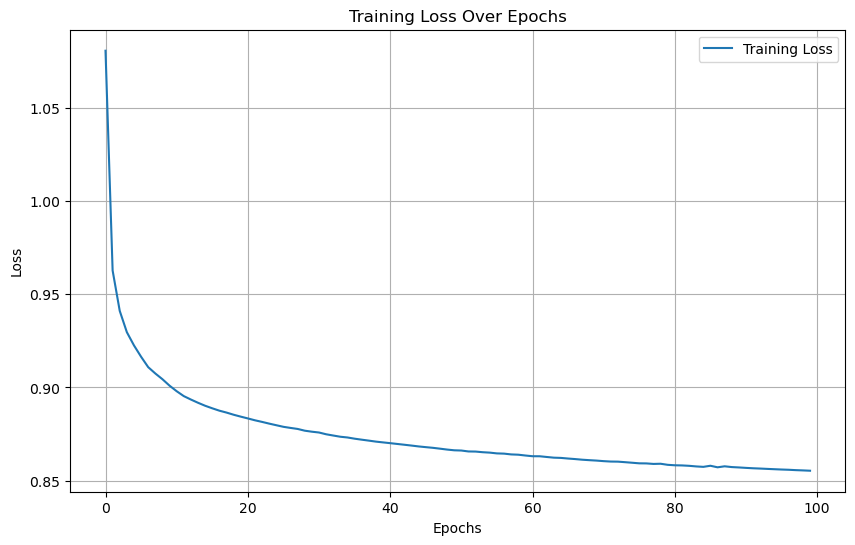

In [203]:
plt.figure(figsize=(10, 6))
plt.plot(modelout.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [205]:
MSE_nn = model.evaluate(X_test, y_test, verbose=0)
print('\nMSE on the test data for neural net: ', MSE_nn)
print('MSE on the test data for linear reg: ', MSE_lm_scaled)


MSE on the test data for neural net:  0.9438723921775818
MSE on the test data for linear reg:  0.9560933024863095


In [207]:
def compute_saliency(model, input_data):
    input_data = tf.convert_to_tensor(input_data)  # Ensure input data is a tensor
    with tf.GradientTape() as tape:
        tape.watch(input_data)
        prediction = model(input_data)
    # Get the gradients of the output with respect to the input
    saliency = tape.gradient(prediction, input_data)
    return saliency.numpy()

saliency_map = compute_saliency(model, X_train)

# Convert list to array and compute mean across samples
all_saliencies = np.array(saliency_map).squeeze()  # Remove extra dimensions if necessary
average_saliency = np.mean(all_saliencies, axis=0)

#compare with regression coefficients and add names of the features
feature_importance = pd.DataFrame({
    "Feature": nrl_train.columns[:-1],
    "Average Saliency": average_saliency,
    "Regression Coefficient (scaled)": lm_scaled.params[1:],
    "Regression p-values": lm_scaled.pvalues[1:].round(5)
})

feature_importance

,Feature,Average Saliency,Regression Coefficient (scaled),Regression p-values
x1,DurationSecs,0.090107,0.122859,0.00000
x2,PossessionSecs,0.055748,0.082453,0.00000
x3,Set_Type,0.061943,0.028468,0.00000
x4,Total_Involved_Tacklers,-0.137192,-0.147098,0.00000
x5,Raw_Tackle_Number,0.008961,-0.018993,0.00000
x6,RoundId,0.081892,0.046551,0.00000
x7,RunOn,-0.024084,0.027092,0.00031
x8,Score,0.099531,0.065855,0.00000
x9,SeasonId,-0.056060,-0.076466,0.02367
x10,SeqNumber,0.010109,0.019019,0.48658


In [158]:
feature_importance.to_csv('feature_importance_table.csv', index=False)